In [36]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
!ls nyiso_load/

20160101palIntegrated_csv 20160501palIntegrated_csv 20160901palIntegrated_csv
20160201palIntegrated_csv 20160601palIntegrated_csv 20161001palIntegrated_csv
20160301palIntegrated_csv 20160701palIntegrated_csv 20161101palIntegrated_csv
20160401palIntegrated_csv 20160801palIntegrated_csv 20161201palIntegrated_csv


In [28]:
df_int = pd.read_csv('nyiso_load/' + '20170301palIntegrated_csv/' + '20170312palIntegrated.csv', parse_dates = ['Time Stamp'])

In [29]:
nyc_ind = df_int.Name.apply(lambda x: 'N.Y.C.' in x)
df_nyc = df_int.loc[nyc_ind,['Time Stamp', 'Integrated Load']].reset_index(drop = True)

In [30]:
df_nyc.head()

,Time Stamp,Integrated Load
0,2017-03-12 00:00:00,5331.5
1,2017-03-12 01:00:00,5103.5
2,2017-03-12 03:00:00,4974.3
3,2017-03-12 04:00:00,4906.6
4,2017-03-12 05:00:00,4920.1


In [31]:
df_nyc.columns = ['time_stamp', 'integrated_load']

In [32]:
df_nyc.set_index('time_stamp', inplace = True)

df_nyc['time_stamp_local'] = df_nyc.index

df_nyc.set_index(df_nyc.index.tz_localize('US/Eastern'), inplace = True)

In [33]:
df_nyc.head()

,integrated_load,time_stamp_local
time_stamp,,
2017-03-12 00:00:00-05:00,5331.5,2017-03-12 00:00:00
2017-03-12 01:00:00-05:00,5103.5,2017-03-12 01:00:00
2017-03-12 03:00:00-04:00,4974.3,2017-03-12 03:00:00
2017-03-12 04:00:00-04:00,4906.6,2017-03-12 04:00:00
2017-03-12 05:00:00-04:00,4920.1,2017-03-12 05:00:00


In [34]:
df_nyc.set_index(df_nyc.index.tz_convert('GMT'), inplace = True)

In [35]:
df_nyc.head()

,integrated_load,time_stamp_local
time_stamp,,
2017-03-12 05:00:00+00:00,5331.5,2017-03-12 00:00:00
2017-03-12 06:00:00+00:00,5103.5,2017-03-12 01:00:00
2017-03-12 07:00:00+00:00,4974.3,2017-03-12 03:00:00
2017-03-12 08:00:00+00:00,4906.6,2017-03-12 04:00:00
2017-03-12 09:00:00+00:00,4920.1,2017-03-12 05:00:00


In [102]:
def select_nyc(dir_path, filename):
    df_int = pd.read_csv(dir_path + filename, parse_dates = ['Time Stamp'])#, dtype={'Integrated Load' : np.float64})
    nyc_ind = df_int.Name.apply(lambda x: 'N.Y.C.' in x)
    df_nyc = df_int.loc[nyc_ind,['Time Stamp', 'Integrated Load']].reset_index(drop = True)
    df_nyc.columns = ['time_stamp', 'integrated_load']
    df_nyc.set_index('time_stamp', inplace = True)
    df_nyc['time_stamp_local'] = df_nyc.index
    df_nyc.set_index(df_nyc.index.tz_localize('US/Eastern', ambiguous='infer'), inplace = True)
    df_nyc.set_index(df_nyc.index.tz_convert('GMT'), inplace = True)
    output_filename = filename[:8] + 'nyc.csv'
    df_nyc.to_csv(dir_path + output_filename)
    return df_nyc

In [103]:
df_t = pd.DataFrame()
for dir_path in os.listdir('nyiso_load/'):
    if 'csv' in dir_path:
        dir_path = 'nyiso_load/' + dir_path + '/'
        for filename in os.listdir(dir_path):
            if 'Integrated' in filename:
                df_t = pd.concat([df_t, select_nyc(dir_path, filename)])
                #select_nyc(dir_path, filename)

In [104]:
df_t.head()

,integrated_load,time_stamp_local
time_stamp,,
2016-01-06 05:00:00+00:00,5303.9,2016-01-06 00:00:00
2016-01-06 06:00:00+00:00,5060.4,2016-01-06 01:00:00
2016-01-06 07:00:00+00:00,4911.2,2016-01-06 02:00:00
2016-01-06 08:00:00+00:00,4851.6,2016-01-06 03:00:00
2016-01-06 09:00:00+00:00,4888.2,2016-01-06 04:00:00


In [105]:
df_t.dtypes

integrated_load             object
time_stamp_local    datetime64[ns]
dtype: object

In [108]:
def is_number(s):
    try:
        float(s)
        return float(s)
    except ValueError:
        return 0.

In [110]:
df_t.loc[:,'integrated_load'] = df_t.integrated_load.apply(is_number)

In [46]:
#df_cmp = pd.read_csv('nyiso_2017.csv', parse_dates=['time_stamp'])

(736274.0, 736275.0)

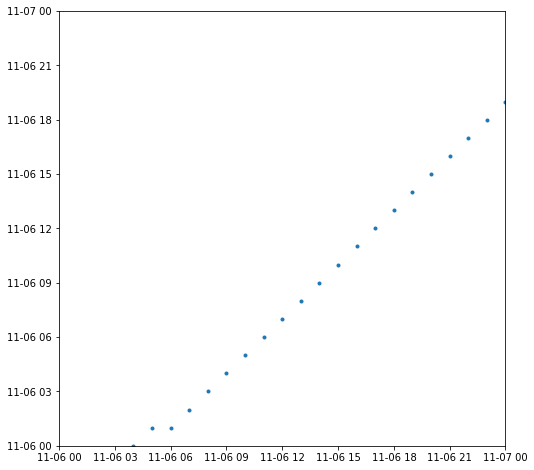

In [111]:
fig, ax = plt.subplots(figsize = (8, 8))
#ax.plot(df_t.loc[:,'time_stamp_local'], df_t.loc[:,'integrated_load'], '.')
ax.plot(df_t.index, df_t.loc[:,'time_stamp_local'], '.', label = 'GMT')
# ax.set_xlim(pd.datetime(2016,3,13), pd.datetime(2016,3,14))
# ax.set_ylim(pd.datetime(2016,3,13), pd.datetime(2016,3,14))
ax.set_xlim(pd.datetime(2016,11,6), pd.datetime(2016,11,7))
ax.set_ylim(pd.datetime(2016,11,6), pd.datetime(2016,11,7))

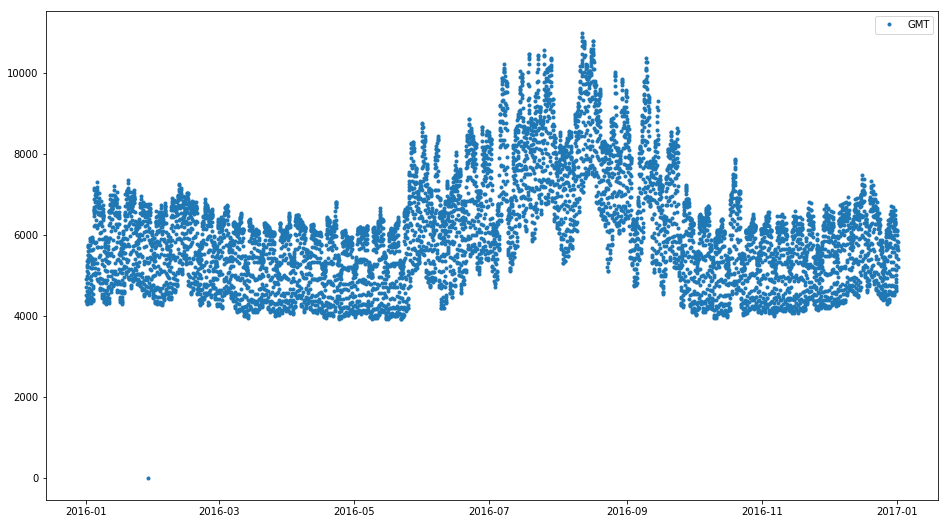

In [112]:
fig, ax = plt.subplots(figsize = (16, 9))
#ax.plot(df_t.loc[:,'time_stamp_local'], df_t.loc[:,'integrated_load'], '.')
ax.plot(df_t.index, df_t.loc[:,'integrated_load'], '.', label = 'GMT')
#ax.plot(df_cmp.iloc[:,0], df_cmp.iloc[:,1], '.', label = 'EST')
ax.legend()
#ax.set_xlim(pd.datetime(2017,3,8), pd.datetime(2017,3,15))

In [113]:
df_t.shape

(8784, 2)

In [114]:
df_t.dtypes

integrated_load            float64
time_stamp_local    datetime64[ns]
dtype: object

In [115]:
df_t.head()

,integrated_load,time_stamp_local
time_stamp,,
2016-01-06 05:00:00+00:00,5303.9,2016-01-06 00:00:00
2016-01-06 06:00:00+00:00,5060.4,2016-01-06 01:00:00
2016-01-06 07:00:00+00:00,4911.2,2016-01-06 02:00:00
2016-01-06 08:00:00+00:00,4851.6,2016-01-06 03:00:00
2016-01-06 09:00:00+00:00,4888.2,2016-01-06 04:00:00


In [116]:
df_t.sort_index(inplace = True)

In [117]:
df_t.head()

,integrated_load,time_stamp_local
time_stamp,,
2016-01-01 05:00:00+00:00,4894.5,2016-01-01 00:00:00
2016-01-01 06:00:00+00:00,4712.7,2016-01-01 01:00:00
2016-01-01 07:00:00+00:00,4510.4,2016-01-01 02:00:00
2016-01-01 08:00:00+00:00,4368.4,2016-01-01 03:00:00
2016-01-01 09:00:00+00:00,4286.8,2016-01-01 04:00:00


In [126]:
df_t.tail()

,integrated_load,time_stamp_local
time_stamp,,
2017-01-01 00:00:00+00:00,5985.5,2016-12-31 19:00:00
2017-01-01 01:00:00+00:00,5818.3,2016-12-31 20:00:00
2017-01-01 02:00:00+00:00,5615.7,2016-12-31 21:00:00
2017-01-01 03:00:00+00:00,5393.9,2016-12-31 22:00:00
2017-01-01 04:00:00+00:00,5200.2,2016-12-31 23:00:00


In [118]:
df_t.to_csv('nyiso_2016.csv')

In [128]:
df_test = pd.read_csv('nyiso_2017.csv', parse_dates=['time_stamp', 'time_stamp_local'])

In [129]:
df_test.head()

,time_stamp,integrated_load,time_stamp_local
0,2017-01-01 05:00:00,5011.2,2017-01-01 00:00:00
1,2017-01-01 06:00:00,4837.3,2017-01-01 01:00:00
2,2017-01-01 07:00:00,4652.6,2017-01-01 02:00:00
3,2017-01-01 08:00:00,4500.7,2017-01-01 03:00:00
4,2017-01-01 09:00:00,4423.5,2017-01-01 04:00:00


In [130]:
df_test.time_stamp.dtype

dtype('<M8[ns]')

In [124]:
df_test.sort_values(['time_stamp'], inplace = True)

In [125]:
df_test.head()

,time_stamp,integrated_load,time_stamp_local
1296,2017-01-01 05:00:00,5011.2,2017-01-01 00:00:00
1297,2017-01-01 06:00:00,4837.3,2017-01-01 01:00:00
1298,2017-01-01 07:00:00,4652.6,2017-01-01 02:00:00
1299,2017-01-01 08:00:00,4500.7,2017-01-01 03:00:00
1300,2017-01-01 09:00:00,4423.5,2017-01-01 04:00:00


In [127]:
df_test.to_csv('nyiso_2017.csv', index = False)